## Pytorch Workflow

In [52]:
what_were_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
}

In [53]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

## 1. Data Preparing and Loading

In [54]:
#parameters
weight = 0.7
bias = 0.3

#create linear model
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [55]:
len(X), X.shape,len(y), y.shape

(50, torch.Size([50, 1]), 50, torch.Size([50, 1]))

In [56]:
train_split = int(.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [57]:
def plot_predictions(train_data=X_train,
                  train_labels=y_train,
                  test_data=X_test,
                  test_labels=y_test,
                  predictions=None):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

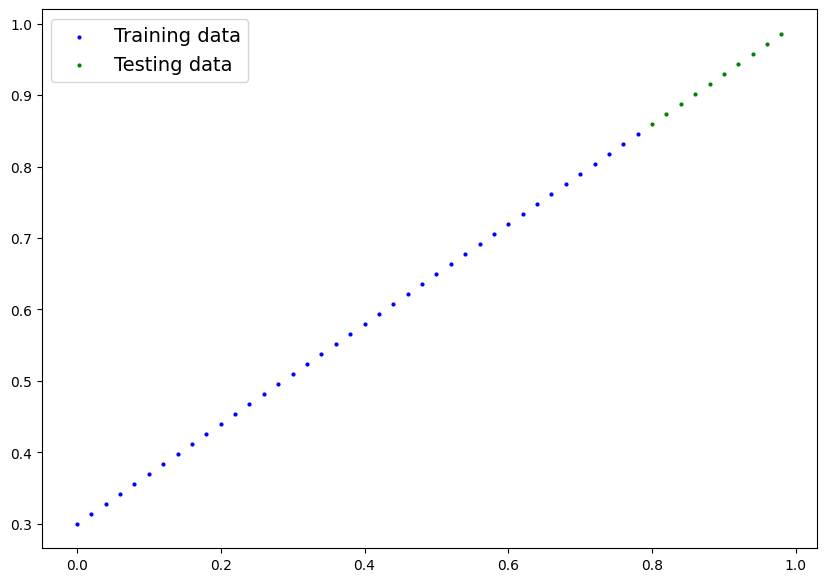

In [58]:
plot_predictions()

## Buildin 1st Pytorch model

In [59]:
#creating Linera Regression class
class LinearRegressionModel(nn.Module): #almost everything in pytorch inhearet from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(
                  1,
                  requires_grad=True,
                  dtype=torch.float)
              )
    self.bias = nn.Parameter(torch.randn(
                1,
                requires_grad=True,
                dtype=torch.float)
            )

  def forward(self, x: torch.Tensor) -> torch.Tensor:   #x is data of type torch.Tensor
    return self.weights * x + self.bias


In [60]:
torch.randn(1)

tensor([0.3367])

In [61]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

In [62]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [63]:
model_0.weights, model_0.bias

(Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True))

In [64]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

## Everything in oneplace

In [65]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

Generating Data

In [66]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [67]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

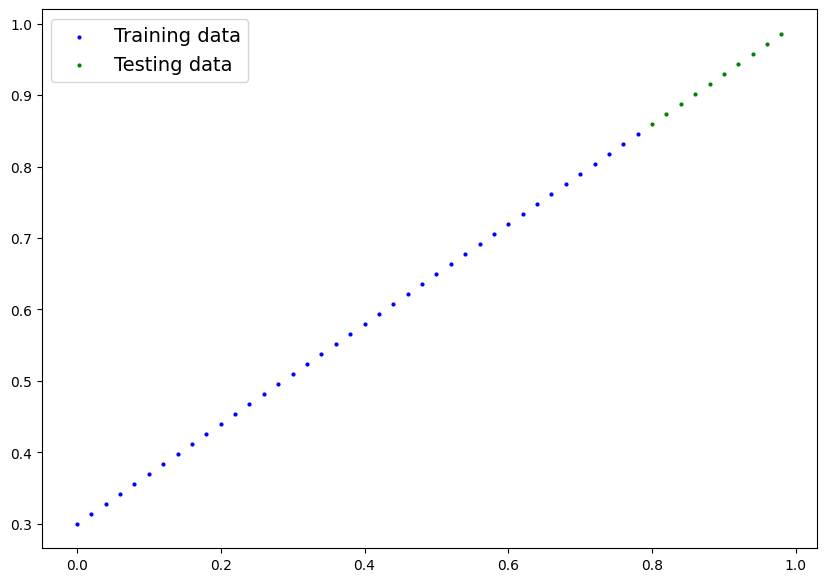

In [68]:
plot_predictions(X_train, y_train, X_test, y_test)

In [69]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [70]:
next(model_1.parameters()).device

device(type='cpu')

In [71]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [72]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [73]:
X_train.device, y_train.device

(device(type='cpu'), device(type='cpu'))

In [76]:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [77]:
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5436570048332214 | Test loss: 0.560505211353302
Epoch: 10 | Loss: 0.42844706773757935 | Test loss: 0.42579540610313416
Epoch: 20 | Loss: 0.31323719024658203 | Test loss: 0.2910855710506439
Epoch: 30 | Loss: 0.1980273425579071 | Test loss: 0.15637575089931488
Epoch: 40 | Loss: 0.0828174576163292 | Test loss: 0.021665919572114944
Epoch: 50 | Loss: 0.023356428369879723 | Test loss: 0.04883447289466858
Epoch: 60 | Loss: 0.019609849900007248 | Test loss: 0.04538799077272415
Epoch: 70 | Loss: 0.01618141122162342 | Test loss: 0.03711546212434769
Epoch: 80 | Loss: 0.012742983177304268 | Test loss: 0.028842901811003685
Epoch: 90 | Loss: 0.00930792186409235 | Test loss: 0.02125724032521248
Epoch: 100 | Loss: 0.005878167692571878 | Test loss: 0.012984705157577991
Epoch: 110 | Loss: 0.0024393596686422825 | Test loss: 0.004712170455604792
Epoch: 120 | Loss: 0.010256479494273663 | Test loss: 0.00033081771107390523
Epoch: 130 | Loss: 0.010256479494273663 | Test loss: 0.000330817711

In [79]:
model_1.eval()

with torch.inference_mode():
  test_pred = model_1(X_test)

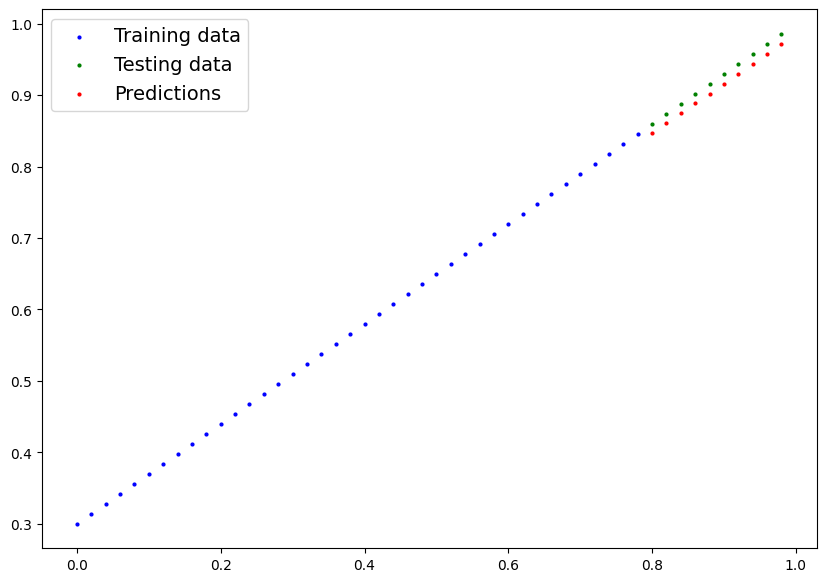

In [83]:
plot_predictions(predictions=test_pred.cpu())

In [84]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

In [86]:
MODEL_NAME = 'pytorc_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

In [87]:
#load it
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [88]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2925], device='cuda:0'))])

In [89]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2925], device='cuda:0'))])